# `Movie Recommendation System`

A **Movie recommendation system** is a form of filtering technology that makes predictions and recommendations about movies for users. 

Machine learning and data mining are put to use to provide consumers with suggestions for more films they might appreciate. 
- Netflix, Amazon Prime, Hulu, and many more all employ movie recommendation algorithms to help their consumers find the content they're looking for.

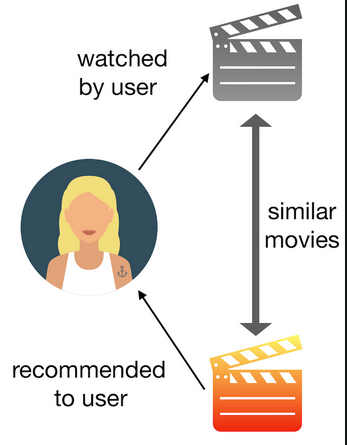

## `Project Overview`

This project uses machine learning to set up a system that suggests movies to watch. The system uses a collection of movie overviews and movie features to suggest movies to users based on what they like and how they behave. Users can get unique movie suggestions from the recommendation system, which uses content-based filtering.

- The datasets are obtained from kaggle.com, which is a reliable resource for conducting data analysis and developing ML/AI systems.

- The first phase in any data science or machine learning project should always be exploratory data analysis (EDA), which is carried out before the more in-depth tasks of data analysis and model evaluation. 

- Content-based filtering is implemented in this Project. It focuses on the attributes or features of items in the recommendation system. It recommends items similar to those that a user has liked in the past, based on the characteristics of the items themselves. 


## Importing the necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings

# You can use warnings to ignore certain warnings
warnings.filterwarnings("ignore")

## Load The datasets

In [3]:
credits=pd.read_csv("tmdb_500.csv")

In [4]:
movies=pd.read_csv("tmdb_5000_movies.csv")

## Description About the Imported datasets 

In [5]:
credits.shape

(4803, 4)

In [6]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


### The `credits` dataset contains 4803 rows and 4 columns.



### The `credits` dataset appears to contain information about a movie. It includes the following columns:

1. `movie_id`: The unique identifier for the movie, which is 19995 in this case.
2. `title`: The title of the movie.
3. `cast`: This column seems to be a list of dictionaries, where each dictionary represents a member of the cast. Each dictionary contains information such as the `cast_id`, `character` they played, `credit_id`, `gender`, `id` (presumably their identifier), and `name` of the cast member. The `order` key likely represents the sequence in which they appear in the credits.


In [7]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [8]:
movies.shape

(4803, 20)

In [9]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


### The `movies` dataset contains 4803 rows and 20 columns.



## The columns in the `movies` dataset are as follows:

1. `budget`: The budget allocated for the movie.
2. `genres`: A list of dictionaries containing information about the genres of the movie, including genre IDs and names.
3. `homepage`: The URL of the movie's homepage.
4. `id`: The ID of the movie.
5. `keywords`: A list of dictionaries containing keywords related to the movie.
6. `original_language`: The original language of the movie, in the first row it is 'en' (English).
7. `original_title`: The original title of the movie.
8. `overview`: A brief summary or overview of the movie's plot.
9. `popularity`: A measure of the movie's popularity, where a higher value indicates higher popularity.
10. `production_companies`: A list of dictionaries containing information about the production companies involved in making the movie.
11. `production_countries`: A list of dictionaries containing information about the countries involved in the movie's production.
12. `release_date`: The release date of the movie in the format YYYY-MM-DD.
13. `revenue`: The revenue generated by the movie.
14. `runtime`: The duration of the movie in minutes.
15. `spoken_languages`: A list of dictionaries containing information about the spoken languages in the movie.
16. `status`: The status of the movie, such as "Released".
17. `tagline`: The tagline associated with the movie.
18. `title`: The title of the movie.
19. `vote_average`: The average vote or rating for the movie.
20. `vote_count`: The total count of votes for the movie.

### This dataset provides comprehensive information about each movie, including financial details, production aspects, language details, and other metadata. 

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Merging both the datasets 

In [11]:
movies=movies.merge(credits,on='title')

In [12]:
movies.shape


(4809, 23)

In [13]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [14]:
#Columns of the Movies dataset to be used and the rest are ignored.

# genres
# id
# keywords
# title
# overview
# cast
# crew

movies=movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [15]:
movies.head(2)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


### Performing EDA(Explanatory Data Analysis)

In [16]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [17]:
movies.dropna(inplace=True)

In [18]:
movies.duplicated().sum()



0

In [19]:
## Calculating The genres of the Movie 
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [20]:
## The Above List is a string List .
## To convert it to a list, use ast.literal_eval(string_list).

In [21]:
import ast

In [22]:
## Customized function to String List to a LIst and Finally append it 
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
        
    return L;


In [23]:
movies['genres']=movies['genres'].apply(convert)

In [24]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [25]:
movies['keywords']=movies['keywords'].apply(convert)

In [26]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [27]:
## movies['cast'][0]

####  Get the First 3 original names of the crew

In [28]:
def convert3(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [29]:
movies['cast']=movies['cast'].apply(convert)

In [30]:
### Get the first 3 names of the cast
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [31]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [32]:
movies['crew']

0       [{"credit_id": "52fe48009251416c750aca23", "de...
1       [{"credit_id": "52fe4232c3a36847f800b579", "de...
2       [{"credit_id": "54805967c3a36829b5002c41", "de...
3       [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4       [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
                              ...                        
4804    [{"credit_id": "52fe44eec3a36847f80b280b", "de...
4805    [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4806    [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4807    [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4808    [{"credit_id": "58ce021b9251415a390165d9", "de...
Name: crew, Length: 4806, dtype: object

#### Get the Director of the Movie 

In [33]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

In [34]:
movies['crew']=movies['crew'].apply(fetch_director)

In [35]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [36]:
movies.overview[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [37]:
## Splittting the movie based on spaces 
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [38]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [39]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x]) 
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x]) 
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x]) 
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x]) 

In [40]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]


In [41]:
## Generating movie tags by combining  multiple columns after splittiing 

movies['tags']=movies['overview']+movies['genres']+movies['cast']+movies['keywords']+movies['crew']

In [42]:
## movies['tags'][0]

In [43]:
final_df=movies[['movie_id','title','tags']]

In [44]:
final_df.head()


,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [45]:
final_df['tags']=final_df['tags'].apply(lambda x: " ".join(x))

In [46]:
final_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction SamWorthington ZoeSaldana SigourneyWeaver cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d JamesCameron'

In [47]:
final_df['tags']=final_df['tags'].apply(lambda x: x.lower())

In [48]:
final_df['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction samworthington zoesaldana sigourneyweaver cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d jamescameron'

In [49]:
final_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."


#### Importing the `CountVectorizer` class from the sklearn.feature_extraction.text module

 - The CountVectorizer is used for converting a collection of text documents into a matrix of token counts, representing the occurrence of words within the documents.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
    

- Using the given settings to initialize the CountVectorizer object, you can use it to turn a set of text documents into a matrix of token counts. 
- After making the matrix, which shows how often each word (or feature) appears in the text documents, it can be fed into different machine learning models.


In [51]:
vectors=cv.fit_transform(final_df['tags']).toarray()

- The above code matches the CountVectorizer object cv to the  final_df's "tags" field. CountVectorizer's fit_transform method takes data and turns it into a document-term matrix. 
-  The values in the vectors array denote the frequency of each word or token in the corresponding document, based on the CountVectorizer settings, such as the maximum number of features and the stop words. 

The code cv.fit_transform(final_df['tags']).toarray()) returns a sparse matrix as output because of the nature of text data and the high dimensionality of the resulting matrix. 

In [52]:
vectors.shape

(4806, 5000)

In [53]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
cv

CountVectorizer(max_features=5000, stop_words='english')

### Importing `nltk` Library

In [56]:
import nltk

In [57]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

- #### The `NLTK PorterStemmer` can be especially helpful for standardizing words and breaking them down to their most basic forms. 
- #### This can help with text analysis jobs that depend on figuring out how often words appear or noticing patterns.

In [58]:
## For Example

ps.stem("LOved")

'love'

### Define a custom function to Apply `ps.stem()` on the List 

In [59]:
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

- #### In higher dimension Euclidean Distance is Not a Good/Reliable Measure to be dealt with and so its better to use cosine Distance. More the distance betwen the vectors the lesser the similarity.

In [60]:
from sklearn.metrics.pairwise import cosine_similarity as CS

- #### In recommendation systems, cosine similarity is often used to measure the similarity between user profiles or item features, helping to identify similar users or recommend items that are similar to a given item.

In [61]:
similarity=CS(vectors)


In [62]:
similarity[0]

array([1.        , 0.08964215, 0.05976143, ..., 0.02519763, 0.02817181,
       0.        ])

In [63]:
similarity[0].shape

(4806,)

In [64]:
similarity[1].shape

(4806,)

In [65]:
final_df[final_df['title']=="Batman Begins"].index[0]

119

In [66]:
## sorted(similarity[0],reverse=True)

In [67]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(539, 0.26089696604360174),
 (1194, 0.2581988897471611),
 (507, 0.25302403842552984),
 (260, 0.25110592822973776),
 (1216, 0.24944382578492943)]

### Generating Custom Function to Suggest Movies

In [68]:
def recommend(movie):
    movie_index=final_df[final_df['title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]    

    for i in movies_list:
        print(final_df.iloc[i[0]].title)

#### `recommend(movie)` is a function for suggesting movies based on the name of a movie and a DataFrame,final_df. 
- It uses a similarity matrix that has already been calculated to find related movies.
- In general, recommend() uses the information in the DataFrame final_df and the previously computed similarity matrix to suggest five movies that are comparable to the input movie.

### Using the `recommend()` to Suggest Movies

In [69]:
## Using the recommend() to test Our Function

recommend('Avatar')

Titan A.E.
Small Soldiers
Independence Day
Ender's Game
Aliens vs Predator: Requiem


In [70]:
recommend('John Carter')

Star Trek: Insurrection
Mission to Mars
Captain America: The First Avenger
Escape from Planet Earth
Ghosts of Mars


In [71]:
recommend('Spectre')

Quantum of Solace
Never Say Never Again
Skyfall
From Russia with Love
Thunderball


In [72]:
recommend('Newlyweds')

Bad Grandpa
Captive
Whale Rider
Elizabethtown
How to Fall in Love


In [73]:
recommend('El Mariachi')

I Am Sam
Tiny Furniture
The Devil Wears Prada
Ghost
Bella


### Importing the pickle Library

In [74]:
import pickle

### The pickle module in Python is used for serializing and deserializing Python objects

In [75]:
pickle.dump(final_df,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

- These lines use the pickle.dump() function to store the final_df DataFrame and the similarity object in the files `'movie_list.pkl'` and `'similarity.pkl'`. 
- Using the pickle.load() method, you can get these objects at a later time.

# `Conclusion` :

In conclusion, this movie recommendation system effectively demonstrates the implementation of content-based filtering technique to provide personalized movie suggestions to users. By leveraging Movie Overviews and movie features, the system successfully predicts user preferences and generates accurate and relevant movie recommendations. The project highlights the importance of utilizing machine learning algorithms in creating user-friendly and personalized content delivery systems.

Content-based filtering is beneficial when user-item interaction data is lacking or recommendations need explanation. It works effectively when item qualities are well-defined and quantified.

Based on product characteristics, it suggests similar things to those a user has loved. This method creates a user profile from their interactions with things and suggests comparable ones.


# `Further Scope` :

#### This system for proposing movies works, but it might be improved. Possible future development areas are:

- Content-based screening and collaboration may improve movie suggestion accuracy and variety.

- Real-time updates: Adjust the advise system to user preferences and movie industry trends.

- Interacting with the User Interface: A fun and dynamic interface improves user experience and suggests movies.

- Scalability: Make sure the system functions effectively with large data sets and many users so it remains that way as users and movie databases increase.

 *The recommendation system may learn what consumers desire and how excellent the recommendations are using user reviews, social media trends, and personal information.*

Consider improving these areas to make movie suggestions more accurate, diverse, and interesting, which will make users happy.

## `To Run the project on the Web`:

- #### Go to the cloned project directory 
- #### Install the necessary dependencies using `pip install -r requirements.txt` 
- #### Run the Command:`streamlt run app.py` and you will be directed to the web application

#### Analysed By - `Subhransu Priyaranjan Nayak`
  